## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Superstore Dataset.csv")
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,SubCategory,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
print("Dimensions: ", df.shape)

print("\n Column Name: ", df.columns)

print("\n Info: ")
df.info()

Dimensions:  (9994, 21)

 Column Name:  Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'SubCategory',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  St

In [6]:
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
print("Null Values in Data: ", df.isnull().sum())

Null Values in Data:  Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
SubCategory      0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
print("duplicate values : ", df.duplicated().sum())

duplicate values :  0


In [9]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Total Quantity:", df['Quantity'].sum())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Total Quantity: 37873


In [11]:
df['Profit'].mean()

28.65689630778467

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


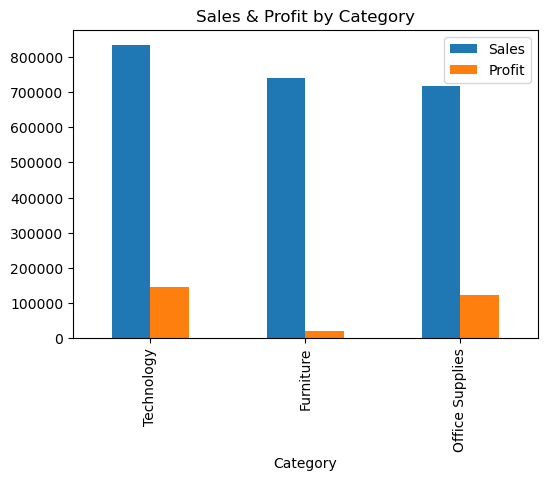

In [ ]:
category = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
print(category)
category.plot(kind='bar', figsize=(6,4), title='Sales & Profit by Category')
plt.show()

## Technology category has highest profit even with moderate sales.

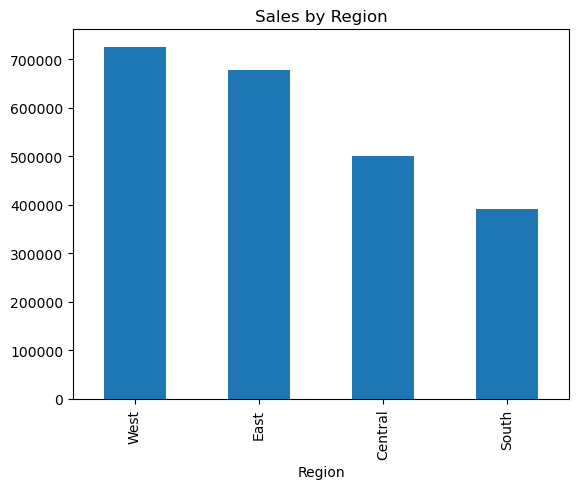

In [ ]:
region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region.plot(kind='bar', title='Sales by Region')
plt.show()

## West region generates the most revenue

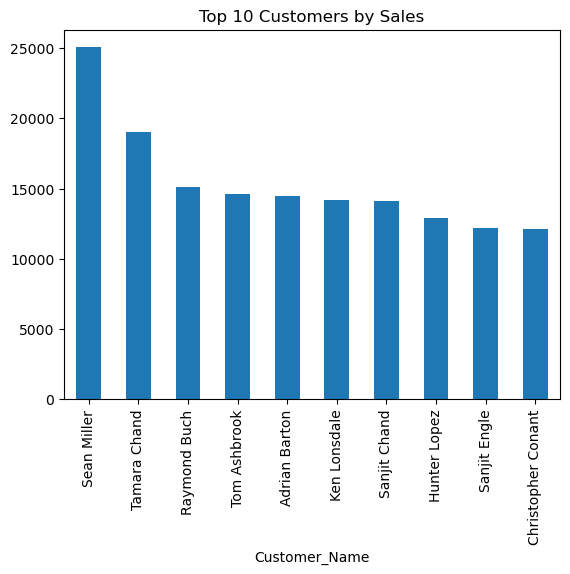

In [ ]:
top_customers = df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales')
plt.show()

## A few customer contribute large share of revenue.

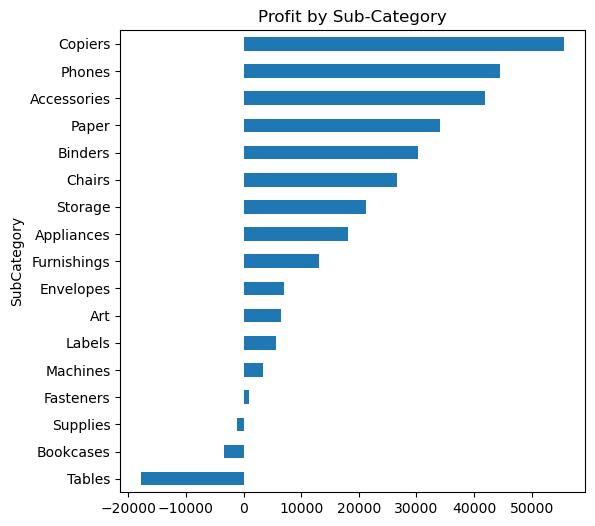

In [ ]:
subcat = df.groupby('SubCategory')['Profit'].sum().sort_values()
subcat.plot(kind='barh', figsize=(6,6), title='Profit by Sub-Category')
plt.show()

## Some Subcategories like Tables may show losses - focus area for management.

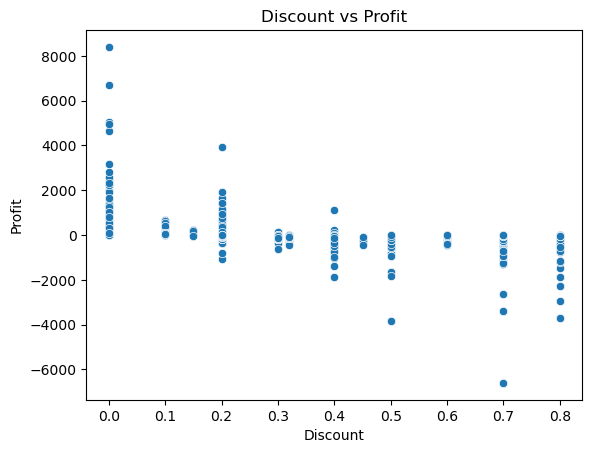

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


In [ ]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

df[['Discount','Profit']].corr()

## Higher discount often reduce profit.

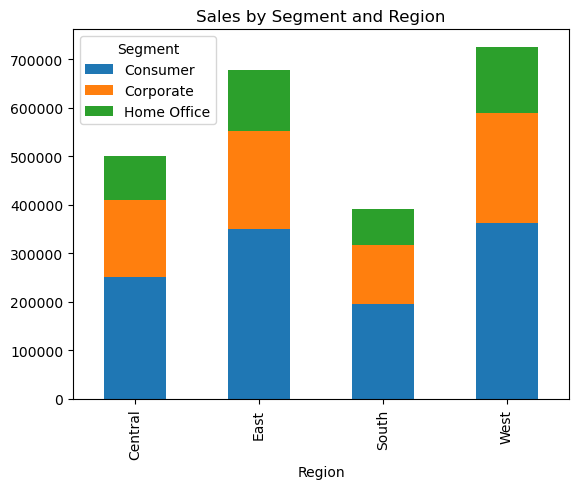

In [ ]:
pd.crosstab(df['Region'], df['Segment'], values=df['Sales'], aggfunc='sum').plot(kind='bar', stacked=True)
plt.title('Sales by Segment and Region')
plt.show()

## Corporate segment perform best in the west and east regions.

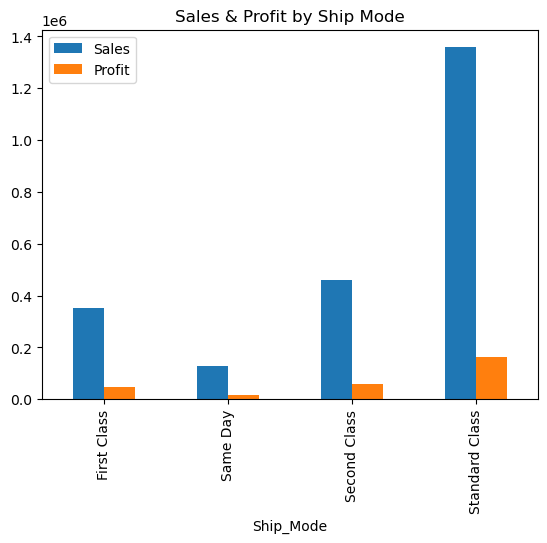

In [ ]:
ship = df.groupby('Ship_Mode')[['Sales','Profit']].sum()
ship.plot(kind='bar', title='Sales & Profit by Ship Mode')
plt.show()

## Standard Class Shipping Dominates in Sales Volume.